In [1]:
# Import library
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# Importing packages - Pandas, Numpy, Seaborn, Scipy
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sys
import matplotlib.style as style; style.use('fivethirtyeight')
from scipy.stats import zscore, norm

np.random.seed(0)

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Oversampling, Undersampling
from imblearn.over_sampling import SMOTE, NearMiss

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

from encode import train_encode_library

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.workclass.fillna(method='ffill', inplace=True)
df.occupation.fillna(method='ffill', inplace=True)
df['native-country'].fillna(method='ffill', inplace=True)

In [4]:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
display(train.shape, test.shape)

(35165, 15)

(8792, 15)

In [5]:
test.to_json('test_evaluate_api.json', orient='index')
output = test.iloc[:, :-1]
output.to_json('test_predict_api.json', orient='index')

In [35]:
train_encode_library = {
    'workclass': {
        'Private': 1,
        'Self-emp-not-inc': 2,
        'Local-gov': 3,
        'State-gov': 4,
        'Self-emp-inc': 5,
        'Federal-gov': 6,
        'Without-pay': 7,
        'Never-worked': 8
    },
    'marital-status': {
        'Married-civ-spouse': 1,
        'Never-married': 2,
        'Divorced': 3,
        'Widowed': 4,
        'Separated': 5,
        'Married-spouse-absent': 6,
        'Married-AF-spouse': 7
    },
    'occupation': {
        'Exec-managerial': 1,
        'Craft-repair': 2,
        'Prof-specialty': 3,
        'Sales': 4,
        'Adm-clerical': 5,
        'Other-service': 6,
        'Machine-op-inspct': 7,
        'Transport-moving': 8,
        'Handlers-cleaners': 9,
        'Farming-fishing': 10,
        'Tech-support': 11,
        'Protective-serv': 12,
        'Priv-house-serv': 13,
        'Armed-Forces': 14
    },
    'relationship': {
        'Husband': 1,
        'Not-in-family': 2,
        'Own-child': 3,
        'Unmarried': 4,
        'Wife': 5,
        'Other-relative': 6
    },
    'race': {
        'White': 1,
        'Black': 2,
        'Asian-Pac-Islander': 3,
        'Amer-Indian-Eskimo': 4,
        'Other': 5
    },
    'gender': {
        'Male': 1,
        'Female': 2
    },
    'native-country': {
        'United-States': 1,
        'Mexico': 2,
        'Philippines': 3,
        'Germany': 4,
        'Puerto-Rico': 5,
        'Canada': 6,
        'El-Salvador': 7,
        'India': 8,
        'Cuba': 9,
        'China': 10,
        'England': 11,
        'South': 12,
        'Dominican-Republic': 13,
        'Jamaica': 14,
        'Italy': 15,
        'Japan': 16,
        'Guatemala': 17,
        'Vietnam': 18,
        'Columbia': 19,
        'Poland': 20,
        'Haiti': 21,
        'Portugal': 22,
        'Taiwan': 23,
        'Iran': 24,
        'Nicaragua': 25,
        'Greece': 26,
        'Ecuador': 27,
        'Peru': 28,
        'Ireland': 29,
        'France': 30,
        'Hong': 31,
        'Thailand': 32,
        'Cambodia': 33,
        'Trinadad&Tobago': 34,
        'Yugoslavia': 35,
        'Outlying-US(Guam-USVI-etc)': 36,
        'Honduras': 37,
        'Scotland': 38,
        'Laos': 39,
        'Hungary': 40,
        'Holand-Netherlands': 41
    },
    'education': {
        'HS-grad': 9,
        'Some-college': 13,
        'Bachelors':  14,
        'Masters': 15,
        'Assoc-voc': 10,
        '11th': 7,
        'Assoc-acdm': 11,
        '10th': 6,
        '7th-8th': 4,
        'Prof-school': 12,
        '9th': 5,
        '12th': 8,
        'Doctorate': 16,
        '5th-6th': 3,
        '1st-4th': 2,
        'Preschool': 1
    }
}


In [7]:
train_encoded = train.replace(train_encode_library,inplace=False)
test_encoded = test.replace(train_encode_library,inplace=False)

In [8]:
train_encoded

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,34,1,238305,13,10,1,6,5,1,2,0,1628,12,1,0
1,30,1,220915,14,13,1,3,1,1,1,0,0,60,1,0
2,47,6,131726,13,10,3,5,2,1,1,0,1876,40,1,0
3,57,1,47619,11,12,3,3,2,2,2,0,0,40,1,0
4,66,1,357750,7,7,4,7,2,2,2,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35160,20,1,133061,5,5,2,4,3,1,1,0,0,40,1,0
35161,47,6,146786,10,11,1,5,1,1,1,0,0,40,1,0
35162,18,1,418176,13,10,2,1,2,2,1,0,0,40,1,0
35163,33,1,229636,9,9,2,2,2,1,1,0,0,40,2,0


In [20]:
X_train = train_encoded.iloc[:, :-1]
y_train = train_encoded["income_>50K"]
X_test = test_encoded.iloc[:, :-1]
y_test = test_encoded["income_>50K"]

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

def train_and_plot(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    print('Model accuracy for train set: {0:.3f}'.format(model.score(X_train, y_train)))
    print('Model accuracy for test set: {0:.3f}'.format(model.score(X_test, y_test)))

    y_pred = model.predict(X_test)

    # Classification Report
    print('\n{}'.format(classification_report(y_test, y_pred)))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix:\n', cm)

    # Accuracy Score
    auc = accuracy_score(y_test, y_pred)
    print('\nAccuracy Score: ', auc.round(3))

    # ROC Curve
    model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize = (12.8 , 6))
    plt.plot(fpr, tpr, label = 'AUC = {})'.\
             format(model_roc_auc.round(4)))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return model

In [21]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 8382
Before OverSampling, counts of label '0': 26783 

After OverSampling, counts of label '1': 26783
After OverSampling, counts of label '0': 26783


[12:24:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy for train set: 0.916
Model accuracy for test set: 0.850

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6656
           1       0.68      0.73      0.70      2136

    accuracy                           0.85      8792
   macro avg       0.79      0.81      0.80      8792
weighted avg       0.85      0.85      0.85      8792


Confusion Matrix:
 [[5906  750]
 [ 568 1568]]

Accuracy Score:  0.85


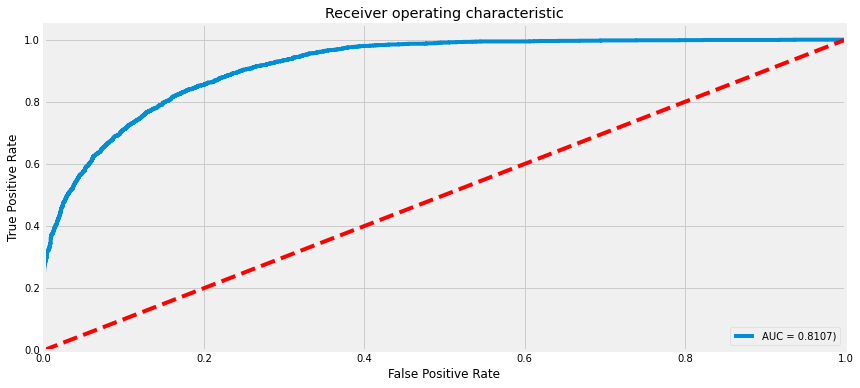

In [23]:
model = XGBClassifier()
model1 = train_and_plot(model, X_train_res, y_train_res, X_test, y_test)

In [24]:
import joblib
#save model
joblib.dump(model1, "model.joblib") 

['model.joblib']

In [26]:
import pickle
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model1, file)

In [27]:
MODEL_PATH = "pickle_model.pkl"
with open(MODEL_PATH, "rb") as rf:
    clf = pickle.load(rf)


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6656
           1       0.68      0.73      0.70      2136

    accuracy                           0.85      8792
   macro avg       0.79      0.81      0.80      8792
weighted avg       0.85      0.85      0.85      8792


Confusion Matrix:
 [[5906  750]
 [ 568 1568]]

Accuracy Score:  0.85


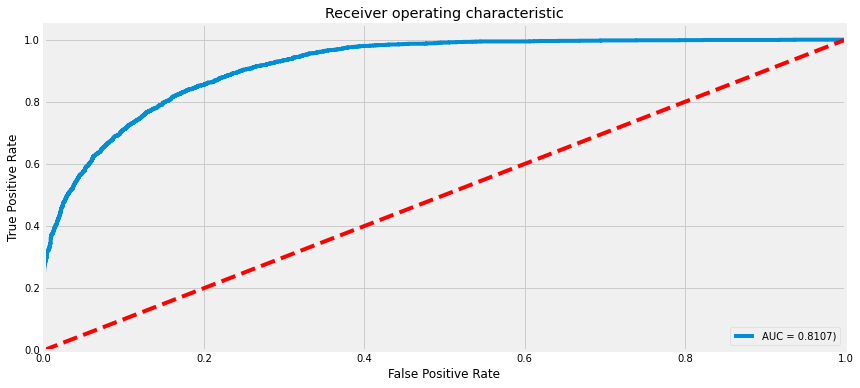

In [34]:
 y_pred = clf.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_test, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_test, y_pred)
print('\nAccuracy Score: ', auc.round(3))

# ROC Curve
model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'AUC = {})'.\
            format(model_roc_auc.round(4)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

In [32]:
X_test.dtypes

age                int64
workclass          int64
fnlwgt             int64
education          int64
educational-num    int64
marital-status     int64
occupation         int64
relationship       int64
race               int64
gender             int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int64
dtype: object

In [33]:
X_test

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,43,3,301638,8,8,1,8,1,1,1,0,1579,40,1
1,59,1,381851,5,5,4,6,4,2,2,0,0,40,1
2,29,3,177398,15,14,1,3,5,1,2,0,0,40,1
3,64,1,260082,8,8,1,2,1,1,1,0,0,40,19
4,44,1,26669,10,11,4,1,4,1,2,0,0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,47,1,101299,9,9,1,2,1,1,1,0,0,40,1
8788,42,5,78765,13,10,3,1,4,1,1,0,0,90,1
8789,46,1,220269,13,10,1,11,1,1,1,0,0,40,1
8790,32,1,199655,13,10,1,5,5,5,2,0,1740,40,1
